# Schrodinger's Equation

## References -- move to bottom
* Atkins & Friedman (Molecular Quantum Mechanics textbook)
* Barba, Lorena A., et al. "MAE 6286 Practical Numerical Methods with Python." The George Washington University. http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/about. 2014
* http://arxiv.org/pdf/0704.3240.pdf

Wave functions are used in quantum mechanics to describe the position of a particle at a certain time. The fundamental equation used to solve these wave functions is the Schrodinger equation. 

\begin{equation}
i\hbar\frac{\partial}{\partial t}\psi(x, t) = -\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2}\psi(x, t)
\end{equation}

Discretized Equation:

\begin{eqnarray}
i\hbar\frac{\psi^{n+1}_i - \psi^n_i}{\Delta t} = \frac{\hbar^2}{2m} \cdot \frac{1}{2} &\left( 
\frac{\psi^{n+1}_{i+1} - 2\psi^{n+1}_i + \psi^{n+1}_{i-1}}{\Delta x^2} 
+ \frac{\psi^n_{i+1}-2\psi^n_i + \psi^n_{i-1}}{\Delta x^2}
\right)
\end{eqnarray}

In [1]:
import numpy
from scipy.linalg import solve
from scipy.interpolate import spline
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
def generateMatrix(N, sigma):
    
    # Set Diagonalfrom discritization
    d = numpy.diag(numpy.ones(N-2)*(1+2j/sigma))
       
    # Set Upper Diagonal
    ud = numpy.diag(numpy.ones(N-3)*-1, 1)
    
    # Set Lower Diagonal
    ld = numpy.diag(numpy.ones(N-3)*-1, -1)
    
    A = d + ud + ld
    
    return A                   

In [3]:
#This is what we know

def genRHS(psi, sigma): 
    
    x = psi[1:-1]*((2j/sigma)+1) + psi[:-2] + psi[2:]
    
    #Dirichlet boundary conditions
    x[0] += psi[0]
    x[-1] += psi[0]
    
    return x

In [4]:
def CrankNicolson(psi, A, nt, sigma):
    
    for t in range(nt):
        psin = psi.copy()
        x = genRHS(psin, sigma)
        
        psi_inside = solve(A, x)
        psi[1:-1] = psi_inside
        
    return psi

In [5]:
L = 1
nx = 21 #21

h = 6.62607004e-34 #[m^2*kg/s]
hbar = h/(2*numpy.pi)
m = 6.6464764063e-27 #[kg] - mass of Helium ion
dx = L/(nx-1)


psii = numpy.zeros(nx, dtype = numpy.complex)
psii[0] = 1

sigma = 0.5 #0.5
dt = sigma*(dx**2)*m/hbar
nt = 10

A = generateMatrix(nx, sigma)

print(dt)

78781.69610432451


In [6]:
#print(A)

In [7]:
psi = CrankNicolson(psii.copy(), A, nt, sigma)

print(psi)

[ 1.00000000+0.j          0.10960598-1.05042239j -0.79679242-0.13775186j
  0.20605724+0.71590215j  1.10169886-0.43640978j -0.19337232-1.53361245j
 -1.53736352-0.30842116j -0.62802495+1.18155587j  0.66075056+0.75650277j
  0.46414791-0.29879663j -0.11330726-0.55169753j  0.07950534-0.15893489j
  0.30603336+0.45170703j -0.28298129+0.61074337j -0.75647896-0.16562401j
 -0.10020771-0.77312303j  0.54794803-0.2174064j   0.10306245+0.35915988j
 -0.39793900-0.06878749j  0.05489750-0.52538714j  0.00000000+0.j        ]


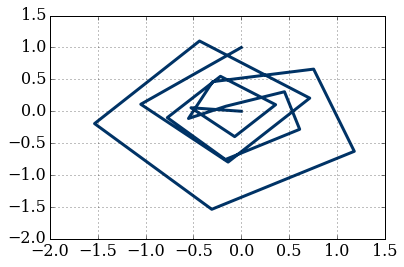

In [8]:
x = numpy.linspace(0,L,nx)

pyplot.plot(psi.imag, psi.real, color='#003366', ls='-', lw=3);
pyplot.grid(True)

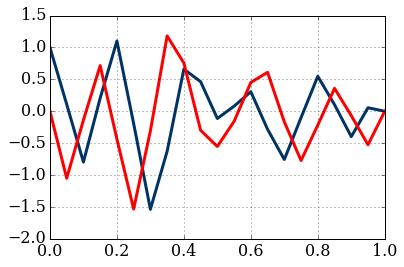

In [9]:
pyplot.plot(x, psi.real, color='#003366', ls='-', lw=3);
pyplot.grid(True)
pyplot.plot(x, psi.imag, color='r', ls='-', lw=3);
pyplot.grid(True)


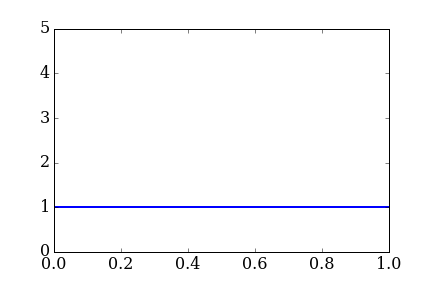
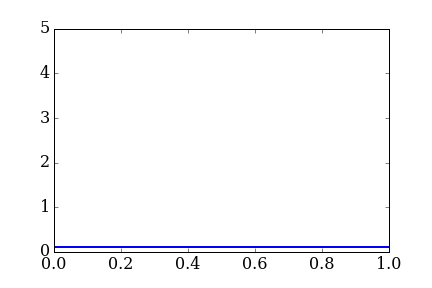
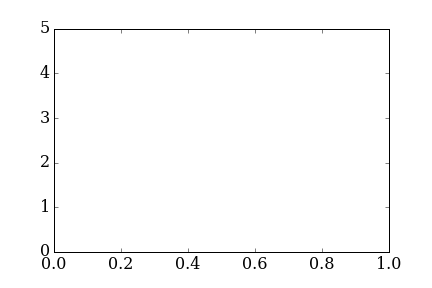
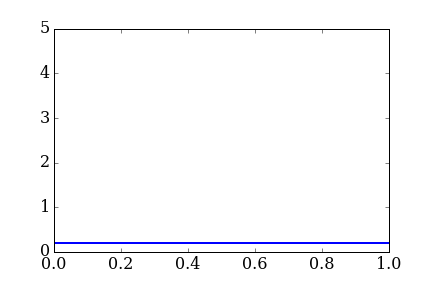
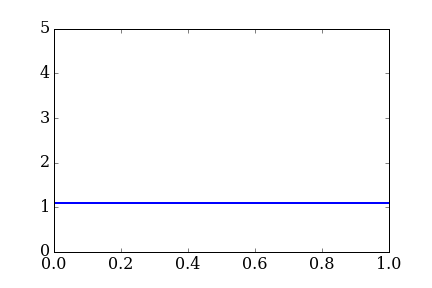
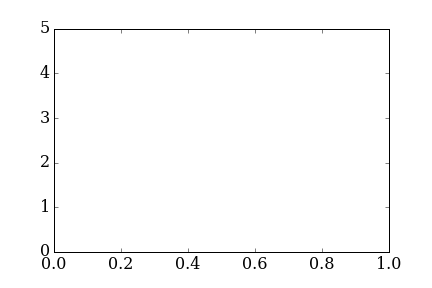
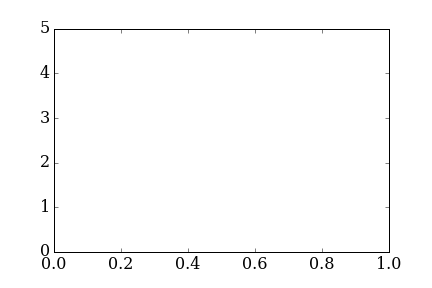
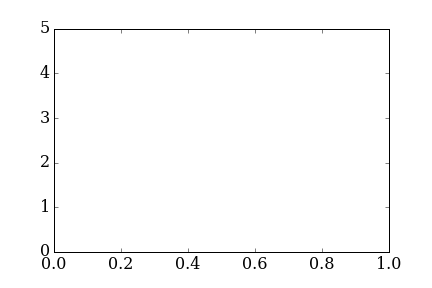
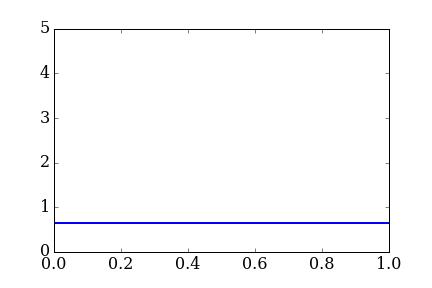
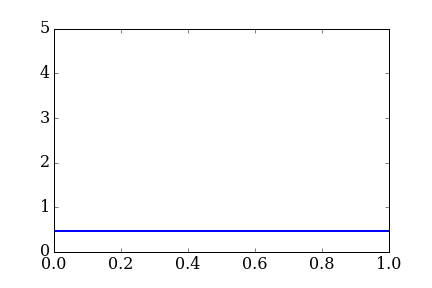
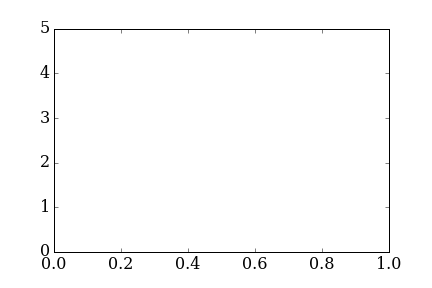
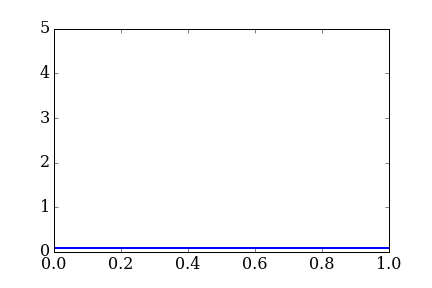
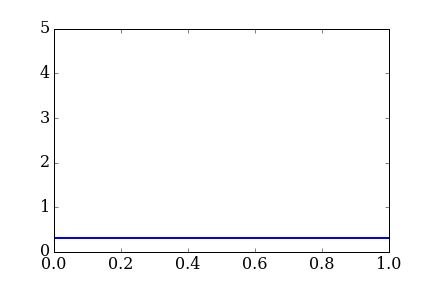
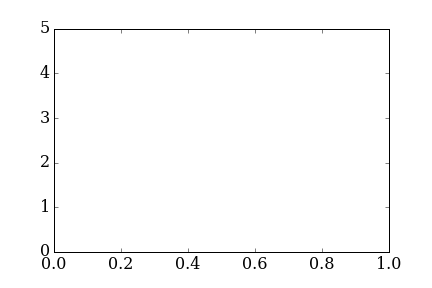
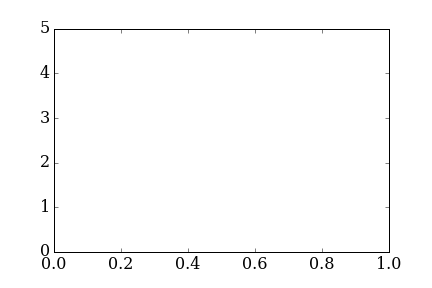
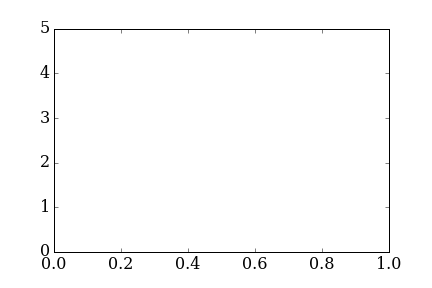
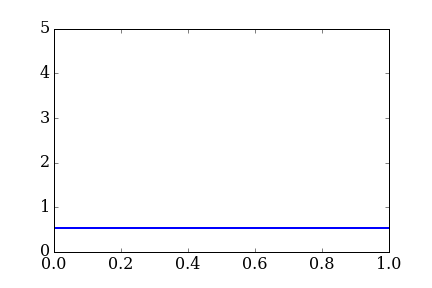
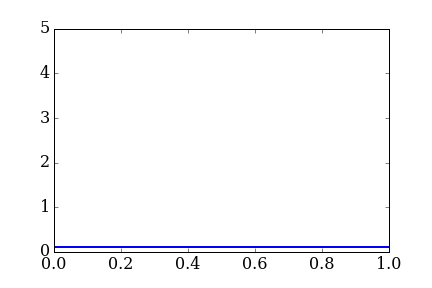
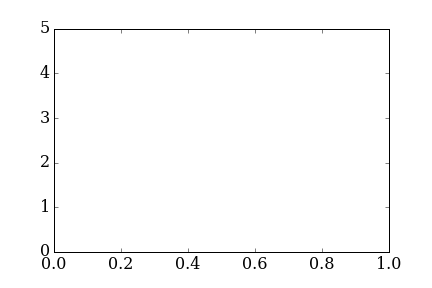
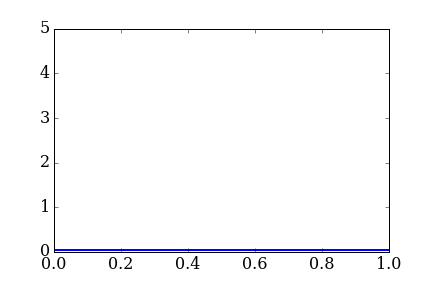
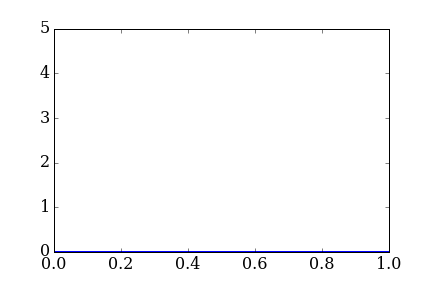

In [10]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

fig = pyplot.figure();
ax = pyplot.axes(xlim = (0,L), ylim = (0,5))
line, = ax.plot([],[],lw = 2)

def animate(data):
    x = numpy.linspace(0, L, nx)
    y = data
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, frames = psi.real, interval = 50)

display_animation(anim, default_mode = 'once')


In [11]:
psi_conj = numpy.conj(psi)
probfunc = psi_conj*psi

#print(psi_conj)
#print()
print(probfunc)
probfunc_real = probfunc.real
print(probfunc_real)

[ 1.00000000+0.j  1.11540066+0.j  0.65385374+0.j  0.55497548+0.j
  1.40419387+0.j  2.38935999+0.j  2.45861019+0.j  1.79048961+0.j
  1.00888775+0.j  0.30471271+0.j  0.31720870+0.j  0.03158140+0.j
  0.29769565+0.j  0.45308588+0.j  0.59969173+0.j  0.60776080+0.j
  0.34751258+0.j  0.13961769+0.j  0.16308717+0.j  0.27904538+0.j
  0.00000000+0.j]
[ 1.          1.11540066  0.65385374  0.55497548  1.40419387  2.38935999
  2.45861019  1.79048961  1.00888775  0.30471271  0.3172087   0.0315814
  0.29769565  0.45308588  0.59969173  0.6077608   0.34751258  0.13961769
  0.16308717  0.27904538  0.        ]


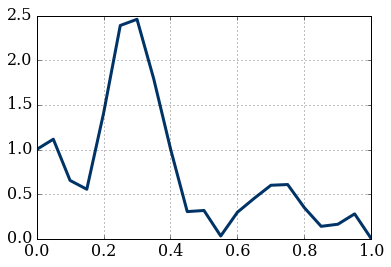

In [12]:
pyplot.plot(x, probfunc_real, color='#003366', ls='-', lw=3);
pyplot.grid(True)


In [41]:
def psi_analytical(x, t, n_max, h, m, L, hbar):
    
    psi = 0
    for n in range (1, n_max+1):
        
        E = ((n**2)*(h**2))/(8*m*(L**2))
        
        summation = numpy.sqrt(2/L)*numpy.sin(n*numpy.pi*x/L)*numpy.exp(-1j*E*t/hbar)
        psi+= summation
        
    return psi


In [42]:
psi_analytical = psi_analytical(x, dt*nt, 1, h, m, L, hbar)
print(psi_analytical)

[  0.00000000e+00 +0.00000000e+00j   2.20810977e-01 -1.36380334e-02j
   4.36184856e-01 -2.69402531e-02j   6.40818415e-01 -3.95791144e-02j
   8.29672899e-01 -5.12434065e-02j   9.98098082e-01 -6.16459159e-02j
   1.14194678e+00 -7.05304983e-02j   1.25767695e+00 -7.76783857e-02j
   1.34243895e+00 -8.29135735e-02j   1.39414564e+00 -8.61071539e-02j
   1.41152384e+00 -8.71804904e-02j   1.39414564e+00 -8.61071539e-02j
   1.34243895e+00 -8.29135735e-02j   1.25767695e+00 -7.76783857e-02j
   1.14194678e+00 -7.05304983e-02j   9.98098082e-01 -6.16459159e-02j
   8.29672899e-01 -5.12434065e-02j   6.40818415e-01 -3.95791144e-02j
   4.36184856e-01 -2.69402531e-02j   2.20810977e-01 -1.36380334e-02j
   1.72861816e-16 -1.06765308e-17j]


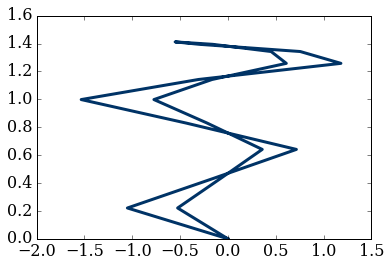

In [43]:
pyplot.plot(psi.imag, psi_analytical.real, color = '#003366', ls = '-', lw =3)

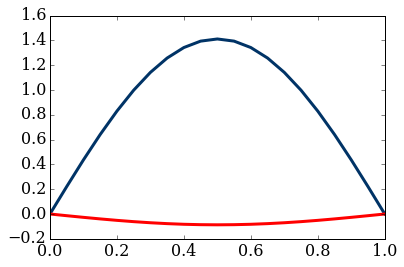

In [44]:
pyplot.plot(x, psi_analytical.real, color = '#003366', ls = '-', lw =3)
pyplot.plot(x, psi_analytical.imag, color = 'r', ls = '-', lw =3)

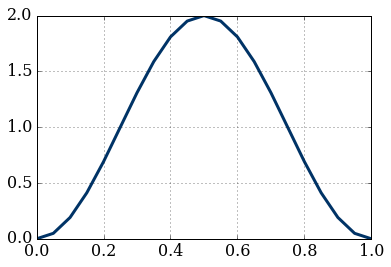

In [45]:
probfunc_analytical = numpy.conj(psi_analytical)*psi_analytical
pyplot.plot(x, probfunc_analytical.real, color='#003366', ls='-', lw=3);
pyplot.grid(True)